## Finite sample SFS calculation and plots

In [5]:
from scipy.special import erfinv
from scipy.stats import gamma
from scipy.stats import nbinom
import numpy as np
import sys
import math
sys.path.insert(1,'numerics_snakemake')
from plot_sfs import *
from matplotlib import pyplot as plt
from power_v2 import *

### Derivation of finite SFS

Assuming that the samples are taken independently from the population with replacement, the number of copies of the deleterious allele in a finite sample of size $n$ is the sum of $n$ Bernoulli trials with probability of success $P$:
$$\xi_k^{(n)}={n\choose k}P^k(1-P)^k$$

Alternatively, we can write:
$$\xi^{(n)}\sim\text{Binom}(n,P)$$

For large $n$ and small $P$, we can approximate this distribution as Poisson:
$$\xi^{(n)}\sim\text{Pois}(nP)$$

The probability of success $P$ is Gamma-distributed:
$$P\sim\text{Gamma}(\alpha,\beta)$$
And it follows that $nP$ is also Gamma-distributed:
$$nP\sim\text{Gamma}(n\alpha,\beta)$$

Then, by property of the Poisson-Gamma mixture, we have that $\xi^{(n)}$ is distributed according to the following Negative Binomal distribution:
$$\xi^{(n)}\sim\text{NB}\left(n\alpha,\frac{\beta}{\beta+1}\right)$$

### Plots

In [6]:
# load data
data = pd.read_csv("numerics_snakemake/spatial_integrals_dim2.csv")
data_pr = pd.read_csv("numerics_snakemake/cleaned_data_dim2_errorFalse.csv")
data_pr = data_pr.loc[data_pr['poly_type'] == '1_1']

sigma_vals = data['sigma'].tolist()
kappa_list = data['u2_GQ'].tolist()
res_vals = data_pr['residues']
pole_vals = data_pr['poles']

In [7]:
# def rate_p(sigma,s,sigma_vals,pole_vals,N=10000,D=1,d=1):
#     l_c=np.sqrt(D/s)
#     return(s*N*(l_c**d)*poles(sigma/l_c,sigma_vals,pole_vals))

# def shape_p(sigma,s,sigma_vals,res_vals,mu=1e-8,N=10000,D=1,d=1):
#     l_c = np.sqrt(D / s)
#     return(mu*N*(l_c**d)*residues(sigma/l_c,sigma_vals,res_vals))

def finite_sfs(n,sigma,s,sigma_vals,pole_vals,res_vals,mu,N=10000,D=1,d=2):
    rate = rate_p(sigma,s,sigma_vals,pole_vals,N,D,d)
    shape = shape_p(sigma,s,sigma_vals,res_vals,mu,N,D,d)
    r = n*shape
    p = rate/(rate+1)
    return r,p

In [114]:
def plot_finite_sfs(n,sg_vals,s,sigma_vals,pole_vals,res_vals,mu=1e-8,N=10000,D=1,d=2,xmin=0,xmax=20):
    fig, ax = plt.subplots(1, 1)
    x = np.arange(xmin,xmax)
    i=0
    col=["red", "blue", "green", "purple"]
    for sg in sg_vals:
        r,p = finite_sfs(n,sg,s,sigma_vals,pole_vals,res_vals,1e-8)
        ax.plot(x, nbinom.pmf(x, r, p), 'bo', color=col[i],ms=8,label=str(sg),alpha=0.5)
        #ax.vlines(x, 0, nbinom.pmf(x, r, p), colors=col[i],lw=5, alpha=0.5)
        i+=1
    plt.title("n="+str(n)+", s="+str(s))
    plt.legend(title="sampling width")
    plt.show()

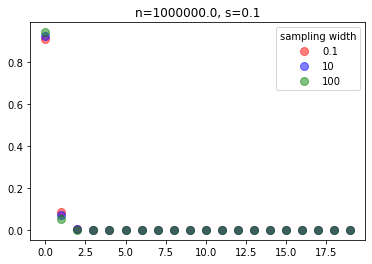

In [115]:
sg_vals=[0.1,10,100]
plot_finite_sfs(1e6,sg_vals,0.1,sigma_vals,pole_vals,res_vals)

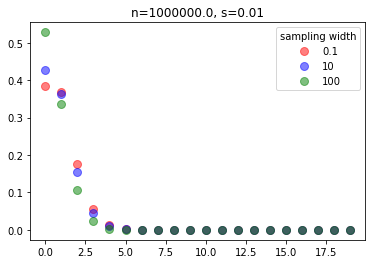

In [116]:
plot_finite_sfs(1e6,sg_vals,0.01,sigma_vals,pole_vals,res_vals)

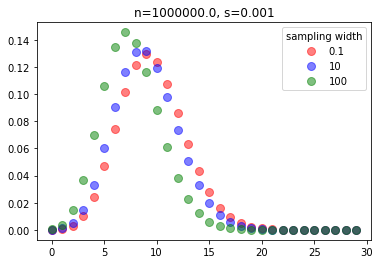

In [117]:
plot_finite_sfs(1e6,sg_vals,0.001,sigma_vals,pole_vals,res_vals,xmax=30)

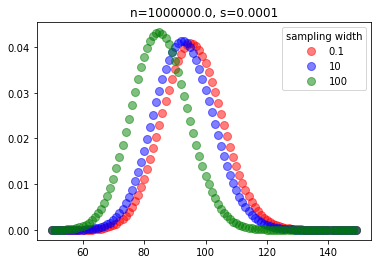

In [118]:
plot_finite_sfs(1e6,sg_vals,0.0001,sigma_vals,pole_vals,res_vals,xmin=50,xmax=150)

In [121]:
#plot_finite_sfs(1e4,sg_vals,0.1,sigma_vals,pole_vals,res_vals)

In [122]:
#plot_finite_sfs(1e5,sg_vals,0.1,sigma_vals,pole_vals,res_vals)